This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fconference-ia/master?filepath=notebooks%2F/1_introduction/N1_Linear_Classification.ipynb)

In [60]:
# Import modules
%matplotlib inline
import matplotlib
import scipy as sp
import matplotlib.pyplot as plt

In [73]:
# Select random seed
random_state = 0

We use scikit-learn to generate a toy 2D data set (two features $x_1$ and $x_2$)  for binary classification  (two classes) 
 - each sample $(x_1,x_2)$ in the dataset is plotted as a 2D point where the two features $x_1$ and $x_2$ are displayed along the abscissa and ordinate axes respectively
 - the corresponding class label $y$ is displayed as a color mark (e.g., yellow or purple)

Text(0, 0.5, '$x_2$')

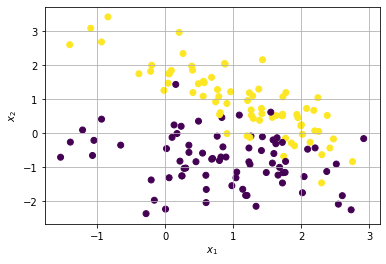

In [80]:
from sklearn.datasets import make_classification
#X are the features (aka inputs, ...), y the labels (aka responses, targets, output...)
X,y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_samples=150,
                          random_state=random_state, n_clusters_per_class=1)
# make the class labels y_i as +1 or -1
y[y==0]=-1
# display the dataset
plt.scatter(X[:,0], X[:,1], c=y)
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Then, a linear model is used to learn the classification function/rule.

In [85]:
from sklearn import linear_model
# Train a linear model, namely  RidgeClassifier, 
# this includes standard linear regression as particular case (alpha=0)
model = linear_model.RidgeClassifier(alpha=0)
model.fit(X,y)

RidgeClassifier(alpha=0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

Text(0, 0.5, '$x_2$')

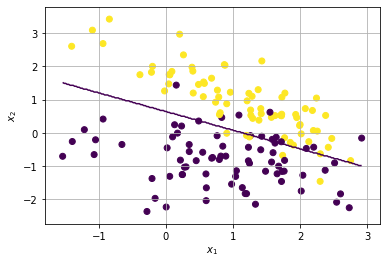

In [82]:
# Plot the decision functions
XX, YY = sp.meshgrid(sp.linspace(X[:,0].min(), X[:,0].max(),200),
                     sp.linspace(X[:,1].min(), X[:,1].max(),200))
XY = sp.vstack([XX.flatten(), YY.flatten()]).T
yp = model.predict(XY)
plt.contour(XX,YY,yp.reshape(XX.shape),[0])
plt.scatter(X[:,0], X[:,1], c=y)
plt.grid("on")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [83]:
# What are the parameter values of the linear boundary equation x_2=a x_1 + b?
a = -model.coef_[0][0]/model.coef_[0][1]
b = model.intercept_[0]
print('boudary equation x_2={} x_1 + {}'.format(a,b))

boudary equation x_2=-0.5596406428840415 x_1 + -0.42432031894620276


In [84]:
#get the documentation for sklearn RidgeClassification object
linear_model.RidgeClassifier?